In [1]:
# install selenium
!pip install selenium

In [2]:
from selenium import webdriver
from selenium.webdriver.common.by import By

# Launch the browser driver
driver = webdriver.Chrome()

# Open a webpage
driver.get('https://example.com')

# Print the page title
print(driver.title)

# Close the browser
driver.quit()

Example Domain


In [ ]:
# XPath
# XML path expression to select specific elements on a web page
# Useful for finding elements in complex DOM structures
element = driver.find_element(By.XPATH, '//div[@class="content"]')

In [ ]:
# CSS Selector
# Uses CSS selectors to find elements based on styles applied to them.
element = driver.find_element(By.CSS_SELECTOR, 'div.content')

Click a button : element.click()  

Enter text : element.send_keys()  

Clear text : element.clear()  

Select from a dropdown : use the Select class

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By

# Launch the browser driver
driver = webdriver.Chrome()

# Open a webpage
driver.get('https://example.com')

# Find the button element
button = driver.find_element(By.ID, 'button-id')
# Click the button
button.click()

# Find the input field element
input_field = driver.find_element(By.NAME, 'username')
# Enter text
input_field.send_keys('example_user')

# Clear text
input_field.clear()

# Close the browser
driver.quit()

In [ ]:
from selenium.webdriver.support.ui import Select

# Find the dropdown element
downdrop = Select(driver.find_element(By.ID, 'dropdown-id'))

# Select options(by value, index, or visible text)
droppdown.select_by_value('fedex')        # select by value attribute
droppdown.select_by_index(2)              # select by index (0-based)
droppdown.select_by_visible_text('FedEx')

Hover over an element

In [ ]:
from selenium.webdriver.common.action_chains import ActionChains

# find an element
element = driver.find_element(By.ID, 'hover-element-id')

# perform the hover action
action = ActionChains(driver)
action.move_to_element(element).perform()

Handling asynchronous loading  
In dynamic pages, JavaScript might load contents after the page is loaded, leading to issues if the crawler tries 
to scrape the page too early

In [ ]:
# implicit wait
driver.implicitly_wait(10)  # wait for 10s

In [ ]:
# explicit wait
from selenium.webdriver.common.by import By 
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC 
element = WebDriverWait(driver, 10).until( # Wait until a specific condition is met
    EC.presence_of_element_located((By.ID, 'element-id')) 
)

<h2>IMDB review crawling</h2>

"John Wick: Chapter 4" 의 모든 리뷰를 crawling함

https://www.imdb.com/title/tt10366206/reviews/?ref_=tt_urv_sm

- 리뷰의 별점과 text를 모두 crawling해서 csv파일로 저장
- https://www.imdb.com/title/tt10366206/ratings/?ref_=tt_ov_rt 처럼 별점을 이용해 바 그래프 만들기

1.selenium이란 무엇인지 설명하세요.
2.html/css/javascript의 역할에 대해서 조사하여 작성하세요.

❑ 학번_이름_imdb_reviews.pdf
❑ 자신의 영화 제목, 리뷰 Bar graph를 첨부하여 제출한다

1.실습에서 사용한 크롤링 코드를 첨부하고, 설명하세요.
2.데이터 csv 파일의 일부를 캡쳐하여 첨부하세요.
3.영화 제목과 리뷰 평점 bar graph를 첨부하고, 각 점수마다 리뷰 한 개씩 선택하여 어떤 리뷰가 해당 점수를주
었는지 작성하세요.

In [2]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC 
from selenium.common.exceptions import NoSuchElementException
import csv

# Launch the browser driver
driver = webdriver.Chrome()
# Open a webpage
driver.get('https://www.imdb.com/title/tt10366206/reviews/?ref_=tt_urv_sm')

while True:
    try:
        driver.implicitly_wait(2)  # wait for 2s
        button = driver.find_element(By.XPATH, '//*[@id="__next"]/main/div/section/div/section/div/div[1]/section[1]/div[3]/div/span[2]') #All
    except NoSuchElementException:
        driver.close()
        driver = webdriver.Chrome()
        driver.get('https://www.imdb.com/title/tt10366206/reviews/?ref_=tt_urv_sm')
        continue;
    ActionChains(driver)\
        .scroll_to_element(button)\
        .click(button)\
        .perform()
    
    element = WebDriverWait(driver, 100).until( # Wait until a specific condition is met (when "2 more" appears)
        EC.presence_of_element_located((By.XPATH, "//span[text()='2 more']"))
    )
    # press "2 more"
    two_more_button = driver.find_element(By.XPATH, "//span[text()='2 more']")
    
    ActionChains(driver)\
        .scroll_to_element(two_more_button)\
        .click(two_more_button)\
        .perform()
    
    # Find all "Spoiler" buttons using CSS Selector
    spoiler_buttons = driver.find_elements(By.CSS_SELECTOR, 'button.review-spoiler-button')

    # Click each button
    for btn in spoiler_buttons:
        ActionChains(driver)\
        .scroll_to_element(btn)\
        .click(btn)\
        .perform()

    
    reviews = driver.find_elements(By.CSS_SELECTOR, 'article.sc-2b6c2ed6-1.gHSlW.user-review-item')
    break;

In [3]:
data = []

for review in reviews:
    review_text = review.find_element(By.CSS_SELECTOR, 'div.ipc-html-content-inner-div').text
    
        
    try:
        # Find rating using the updated class
        star_rating = review.find_element(By.CSS_SELECTOR, 'span.ipc-rating-star--rating').text
    except NoSuchElementException:
        star_rating = 'No rating'
    data.append([star_rating, review_text])

In [4]:
# Save to CSV
with open('reviews.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Rating', 'Review'])
    writer.writerows(data)

# Close the browser
#driver.quit()


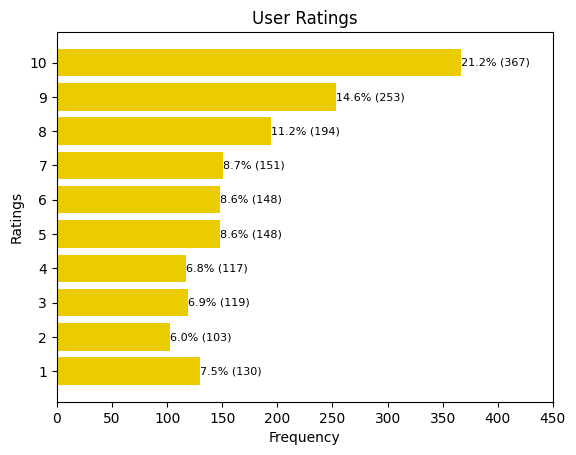

In [5]:
import matplotlib.pyplot as plt
import csv

# Read data from the CSV file
ratings = []
with open('reviews.csv', mode='r', newline='', encoding='utf-8') as file:
    reader = csv.DictReader(file)
    for row in reader:
        if row['Rating'] != 'No rating':
            ratings.append(int(row['Rating']))

# Count the frequency of each rating
rating_counts = {}
for rating in ratings:
    if rating in rating_counts:
        rating_counts[rating] += 1
    else:
        rating_counts[rating] = 1

# Calculate the percentage of each rating
total_reviews = sum(rating_counts.values())
rating_percentages = {rating: (count / total_reviews) * 100 for rating, count in rating_counts.items()}

# Create the bar graph
bars = plt.barh(list(rating_counts.keys()), list(rating_counts.values()), color='#ebcc00', tick_label=list(rating_counts.keys()))

# Add text annotations for each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width/total_reviews:.1%} ({int(width)})', ha='left', va='center', size=8)

plt.xlim([0, 450])     
plt.ylabel('Ratings')
plt.xlabel('Frequency')
plt.title('User Ratings')
plt.savefig("User Ratings.jpg")
plt.show()
